# Linear Spline Interpolation In Image Processing​

In [2]:
# importing required liberies
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate as ip
import time

### For linear interpolation

Format: ip.interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)


<function matplotlib.pyplot.show(close=None, block=None)>

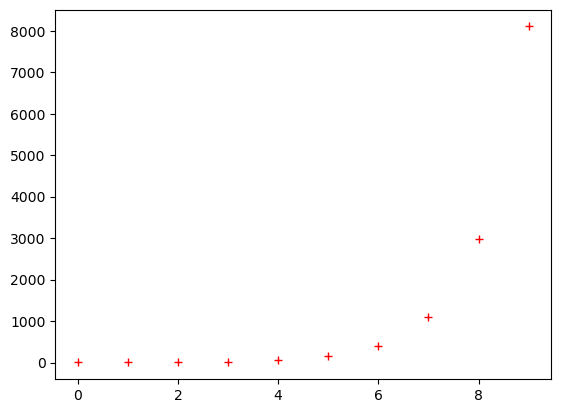

In [2]:
# Example 1
x = np.arange(0,10)  # list of 10 positive integers
y = np.exp(x)        # y = e^x
f = ip.interp1d(x,y) # Applying 1D interpollation
plt.plot(x,y,'r+')
plt.show

Now, we have the input (x,y) and we have calculated the interpolated value and stored in f.

<function matplotlib.pyplot.show(close=None, block=None)>

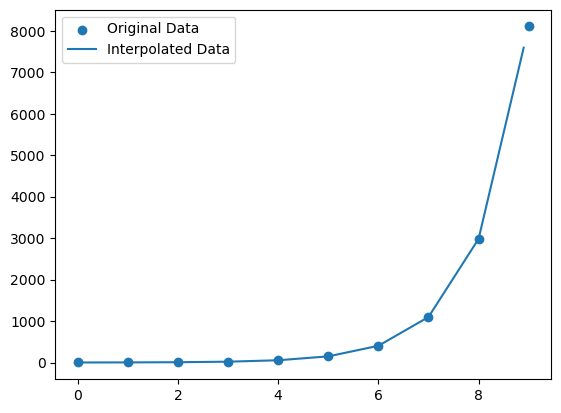

In [8]:
# Generating graph of interpollated values
x_graph = np.arange(0, 9, 0.1)
y_graph = f(x_graph) # generating y values using interpolation function returned by `interp1d`
plt.scatter(x, y, label='Original Data')
plt.plot(x_graph,y_graph, label='Interpolated Data')
plt.legend()
plt.show

We can clearly see that the blue line is the interpollated line. The coordinates are ganerataed from the interpolation funation.

#### Why do we need Spline Interpolation?

Now for the function y = 1 / (1+25x^2) on [-1,1] on given values.
reference: https://math.libretexts.org/Under_Construction/Numerical_Methods_with_Applications_(Kaw)/5%3A_Interpolation/5.05%3A_Spline_Method_of_Interpolation

<function matplotlib.pyplot.show(close=None, block=None)>

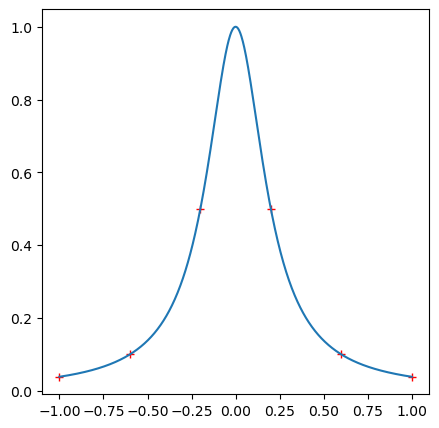

In [18]:
plt.rcParams["figure.figsize"] = [5,5]
x2 = [ -1.0 , -0.6, -0.2, 0.2, 0.6, 1.0]
y2 = [ 0.038461, 0.1, 0.5, 0.5, 0.1, 0.038461]

def f(x):
   return (1 / (1+25*x*x))

x3 = np.linspace(-1,1,1000) # For function

plt.plot(x2,y2,'r+',x3,f(x3))
plt.show

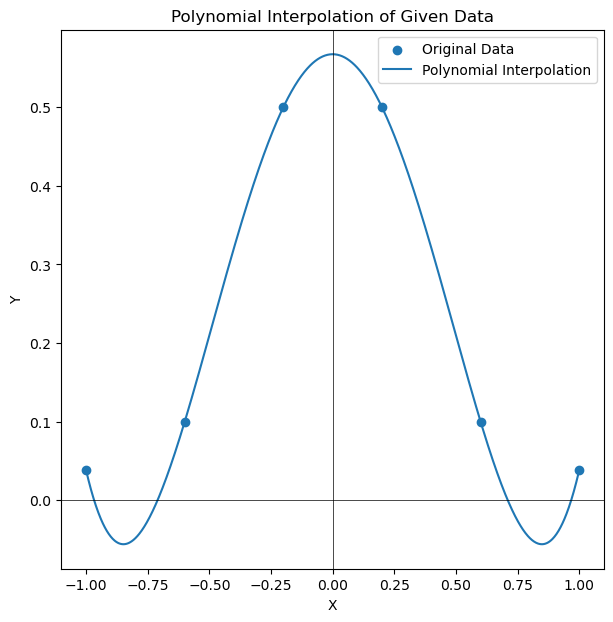

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x2 = np.array([-1.0, -0.6, -0.2, 0.2, 0.6, 1.0])
y2 = np.array([0.038461, 0.1, 0.5, 0.5, 0.1, 0.038461])

# Polynomial interpolation
degree = len(x2) - 1  # Degree of the polynomial (one less than the number of data points)
coefficients = np.polyfit(x2, y2, degree)
polynomial = np.poly1d(coefficients)

#Now through these six data points, one can pass a fifth-order interpolating polynomial.
#f5(x)=1.2019*x^4−1.7308*x^2+0.56731

# Generating more points for smooth curve
x_interp = np.linspace(-1.0, 1.0, 1000)
y_interp_polynomial = polynomial(x_interp)

# Plotting original data and polynomial interpolation
plt.scatter(x2, y2, label='Original Data')
plt.plot(x_interp, y_interp_polynomial, label='Polynomial Interpolation')

# Drawing x and y axes
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.legend()
plt.title('Polynomial Interpolation of Given Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


###### These are global interpolation, which uses all the values given to genereate the result.
###### So, sometime they can be unpractical as they are computationally expensive (As they will analyze all the points).
###### Also, they can be oscillatory and can be unstable.
###### Therefore, we need local interpolation, which uses only the nearby values to generate the result, which is called spline interpolation.


<function matplotlib.pyplot.show(close=None, block=None)>

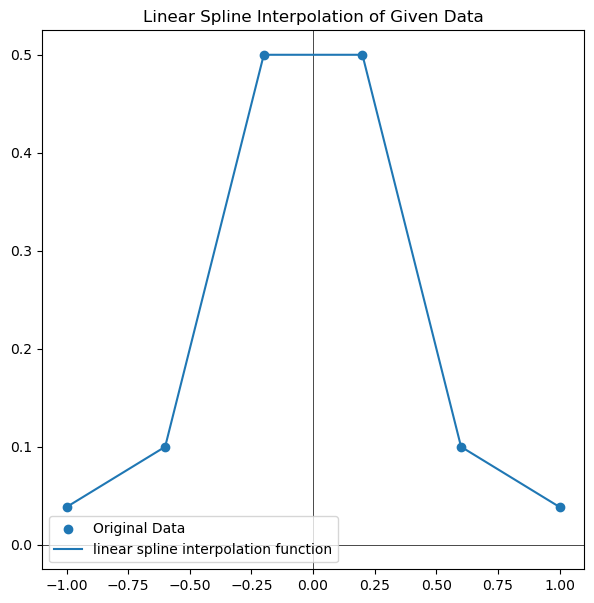

In [28]:
# For 5th order interpolation
x2 = [ -1.0 , -0.6, -0.2, 0.2, 0.6, 1.0]
y2 = [ 0.038461, 0.1, 0.5, 0.5, 0.1, 0.038461]

# Applying 5th order interpollation
f = ip.interp1d(x2,y2) 

# Drawing x and y axes
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Linear Spline Interpolation of Given Data')

# Plotting original data and interpolated curve
plt.scatter(x2, y2, label='Original Data')
plt.plot(x2,f(x2), label='linear spline interpolation function')
plt.legend()
plt.show


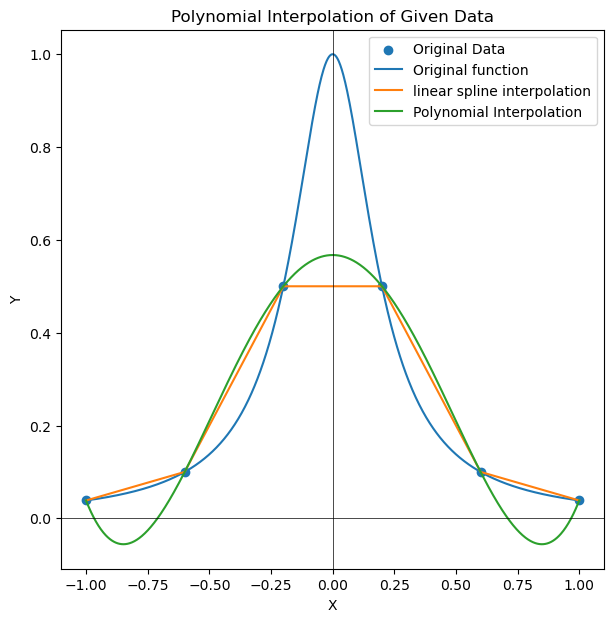

In [32]:
plt.rcParams["figure.figsize"] = [7,7]
def f(x):
   return (1 / (1+25*x*x))

x3 = np.linspace(-1,1,1000)

# Plotting original data and polynomial interpolation
plt.scatter(x2, y2, label='Original Data')
plt.plot(x3,f(x3), label='Original function')
plt.plot(x2,f(x2), label='linear spline interpolation')
plt.plot(x_interp, y_interp_polynomial, label='Polynomial Interpolation')

# Drawing x and y axes
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.legend()
plt.title('Polynomial Interpolation of Given Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

The choice between polynomial interpolation and linear spline interpolation depends on the specific characteristics of the data and the desired properties of the interpolated function. Polynomial interpolation provides more flexibility but may suffer from oscillations, while linear spline interpolation offers simplicity and stability at the cost of smoothness.

# Bi-Linear Spline Interpolation in Images


Linear spline interpolation is commonly used in image processing for tasks like image resizing or geometric transformations. In the context of images, linear spline interpolation is often applied to estimate pixel values at non-integer coordinates based on the values at nearby integer coordinates.

In [3]:
from PIL import Image
import numpy as np

In [4]:
image_array = np.zeros((3,3)) # zero is HEX value of black pixel, so making black canvas

# Making White
image_array[0,1] = 255
image_array[1,0] = 255
image_array[1,2] = 255
image_array[2,1] = 255


image = Image.fromarray(image_array)
image.show(title='Original Image')

# Resize the image using linear spline interpolation
new_width, new_height = 7,7
resized_image = image.resize((new_width, new_height), resample=Image.BILINEAR)

# Display the original and resized images
resized_image.show(title='Resized image using bilinear spline interpolation')


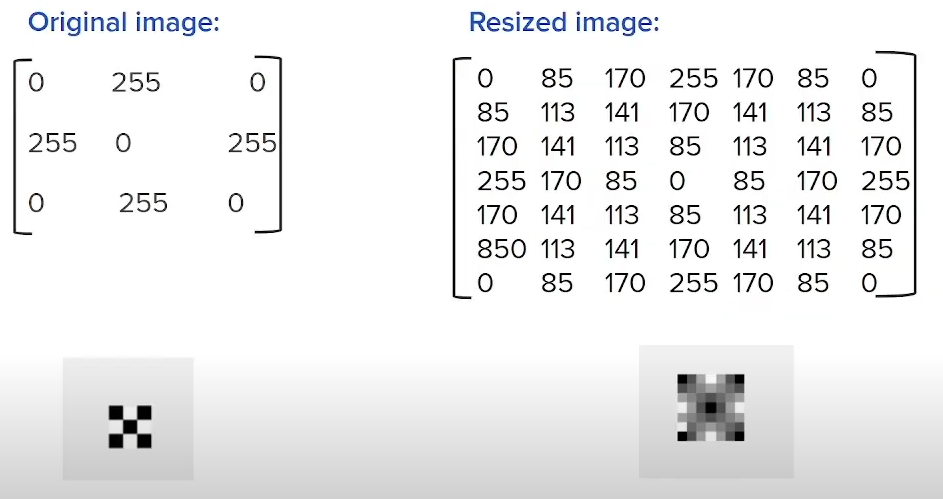

In [5]:
# Createing a simple image with a diagonal line
width, height = 75,75

image_array = np.zeros((height, width)) # zero is HEX value of black pixel, so making black canvas

# Drawing image
for i in range(0, width):
    for j in range(0,height):
        if i in range(25,51) and j not in range(25,51):
            image_array[i, j] = 255
        elif i not in range(25,51) and j in range(25,51):
            image_array[i,j] = 255

image = Image.fromarray(image_array)
image.show(title='Original Image')

# Resize the image using linear spline interpolation
new_width, new_height = 200,200
resized_image = image.resize((new_width, new_height), resample=Image.BILINEAR)

# Display the original and resized images
resized_image.show(title='Resized image using bilinear spline interpolation')



In [8]:
image = Image.open("img1.png")

# Resize the image using linear spline interpolation
new_width, new_height = 100, 100
resized_image = image.resize((new_width, new_height), resample=Image.BILINEAR)

# Display the original and resized images
image.show(title='Original Image')
resized_image.show(title='Resized Image 100x100')

# 1000 x 1000
new_width, new_height = 1000, 1000
resized_image = image.resize((new_width, new_height), resample=Image.BILINEAR)

# Display the original and resized images
resized_image.show(title='Resized Image 1000x1000')


We can see the result as rescaled photos as its major application.